In [12]:
import numpy as np 
from NNetwork import NNetwork as nn
from src.supervised_NDL.SNDL import sndl_equalEdge, sndl_reg
from util.plotting import *

In [2]:
### #ntwk_list = ['Caltech36', 'UCLA26', 'true_edgelist_for_ER_5000_mean_degree_50', 'true_edgelist_for_BA_5000_m_50', 'true_edgelist_for_SW_5000_k_50_p_0.1', 'SBM1']
ntwk_list = ['Caltech36', 'UCLA26']
sampling_alg = 'pivot'
save_folder = 'output/network/'

graph_list = []
for ntwk in ntwk_list:
    path = "data/" + str(ntwk) + '.txt'
    G = nn.NNetwork()
    G.load_add_edges(path, increment_weights=False, use_genfromtxt=True)
    graph_list.append(G)

In [3]:
W, beta, H = sndl_equalEdge(graph_list, sample_size_1= 1000, k=16, xi=4, n_components=16, iter = 50)

This is the second sample_size: 44884
num of subgraphs induced on k-paths: 1000
num of subgraphs induced on k-paths: 44884
initial loading beta [[ 0.45011889 -0.80634623  0.22520785  0.24318245 -0.78315174  0.00955821
   0.69945882 -0.01593996 -0.20397894  0.0899345  -0.98705011 -0.78575004
  -0.05892409 -0.79991869  0.27799007  0.01772441  0.93901957]]


  2%|▏         | 1/50 [00:00<00:36,  1.34it/s]

--- Training --- [threshold, AUC] =  [np.float64(0.983), np.float64(0.976)]
--- Iteration 0: Training loss --- [Data, Label, Total] = [900846.944868.3, 2441.903258.3, 3605829.682732.3]


 20%|██        | 10/50 [00:05<00:22,  1.77it/s]

--- Training --- [threshold, AUC] =  [np.float64(0.98), np.float64(0.966)]
--- Iteration 10: Training loss --- [Data, Label, Total] = [382816.713621.3, 2675.333801.3, 1533942.188286.3]
!!! pred_type filter


 22%|██▏       | 11/50 [00:21<03:27,  5.33s/it]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [np.float64(0.98), np.float64(0.966), np.float64(0.885), np.float64(0.938)]


 40%|████      | 20/50 [00:27<00:23,  1.27it/s]

--- Training --- [threshold, AUC] =  [np.float64(0.981), np.float64(0.967)]
--- Iteration 20: Training loss --- [Data, Label, Total] = [325686.951289.3, 2613.134290.3, 1305360.939448.3]
!!! pred_type filter


 42%|████▏     | 21/50 [00:41<02:18,  4.78s/it]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [np.float64(0.981), np.float64(0.967), np.float64(0.885), np.float64(0.937)]


 60%|██████    | 30/50 [00:46<00:14,  1.33it/s]

--- Training --- [threshold, AUC] =  [np.float64(0.981), np.float64(0.967)]
--- Iteration 30: Training loss --- [Data, Label, Total] = [293145.607840.3, 2612.036032.3, 1175194.467390.3]
!!! pred_type filter


 62%|██████▏   | 31/50 [01:00<01:28,  4.65s/it]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [np.float64(0.981), np.float64(0.967), np.float64(0.886), np.float64(0.938)]


 80%|████████  | 40/50 [01:05<00:07,  1.26it/s]

--- Training --- [threshold, AUC] =  [np.float64(0.981), np.float64(0.967)]
--- Iteration 40: Training loss --- [Data, Label, Total] = [279441.860320.3, 2612.090675.3, 1120379.531955.3]
!!! pred_type filter


 82%|████████▏ | 41/50 [01:18<00:41,  4.60s/it]

--- Validation --- [threshold, AUC, Accuracy, F score] =  [np.float64(0.981), np.float64(0.967), np.float64(0.888), np.float64(0.939)]


100%|██████████| 50/50 [01:24<00:00,  1.68s/it]


!!! pred_type filter


In [4]:
print(f"This is W's shape: {W.shape}")
print(f"This is beta's shape: {beta.shape}")
print(f"This is H's shape: {H.shape}")

This is W's shape: (256, 16)
This is beta's shape: (1, 17)
This is H's shape: (16, 45884)


16.0

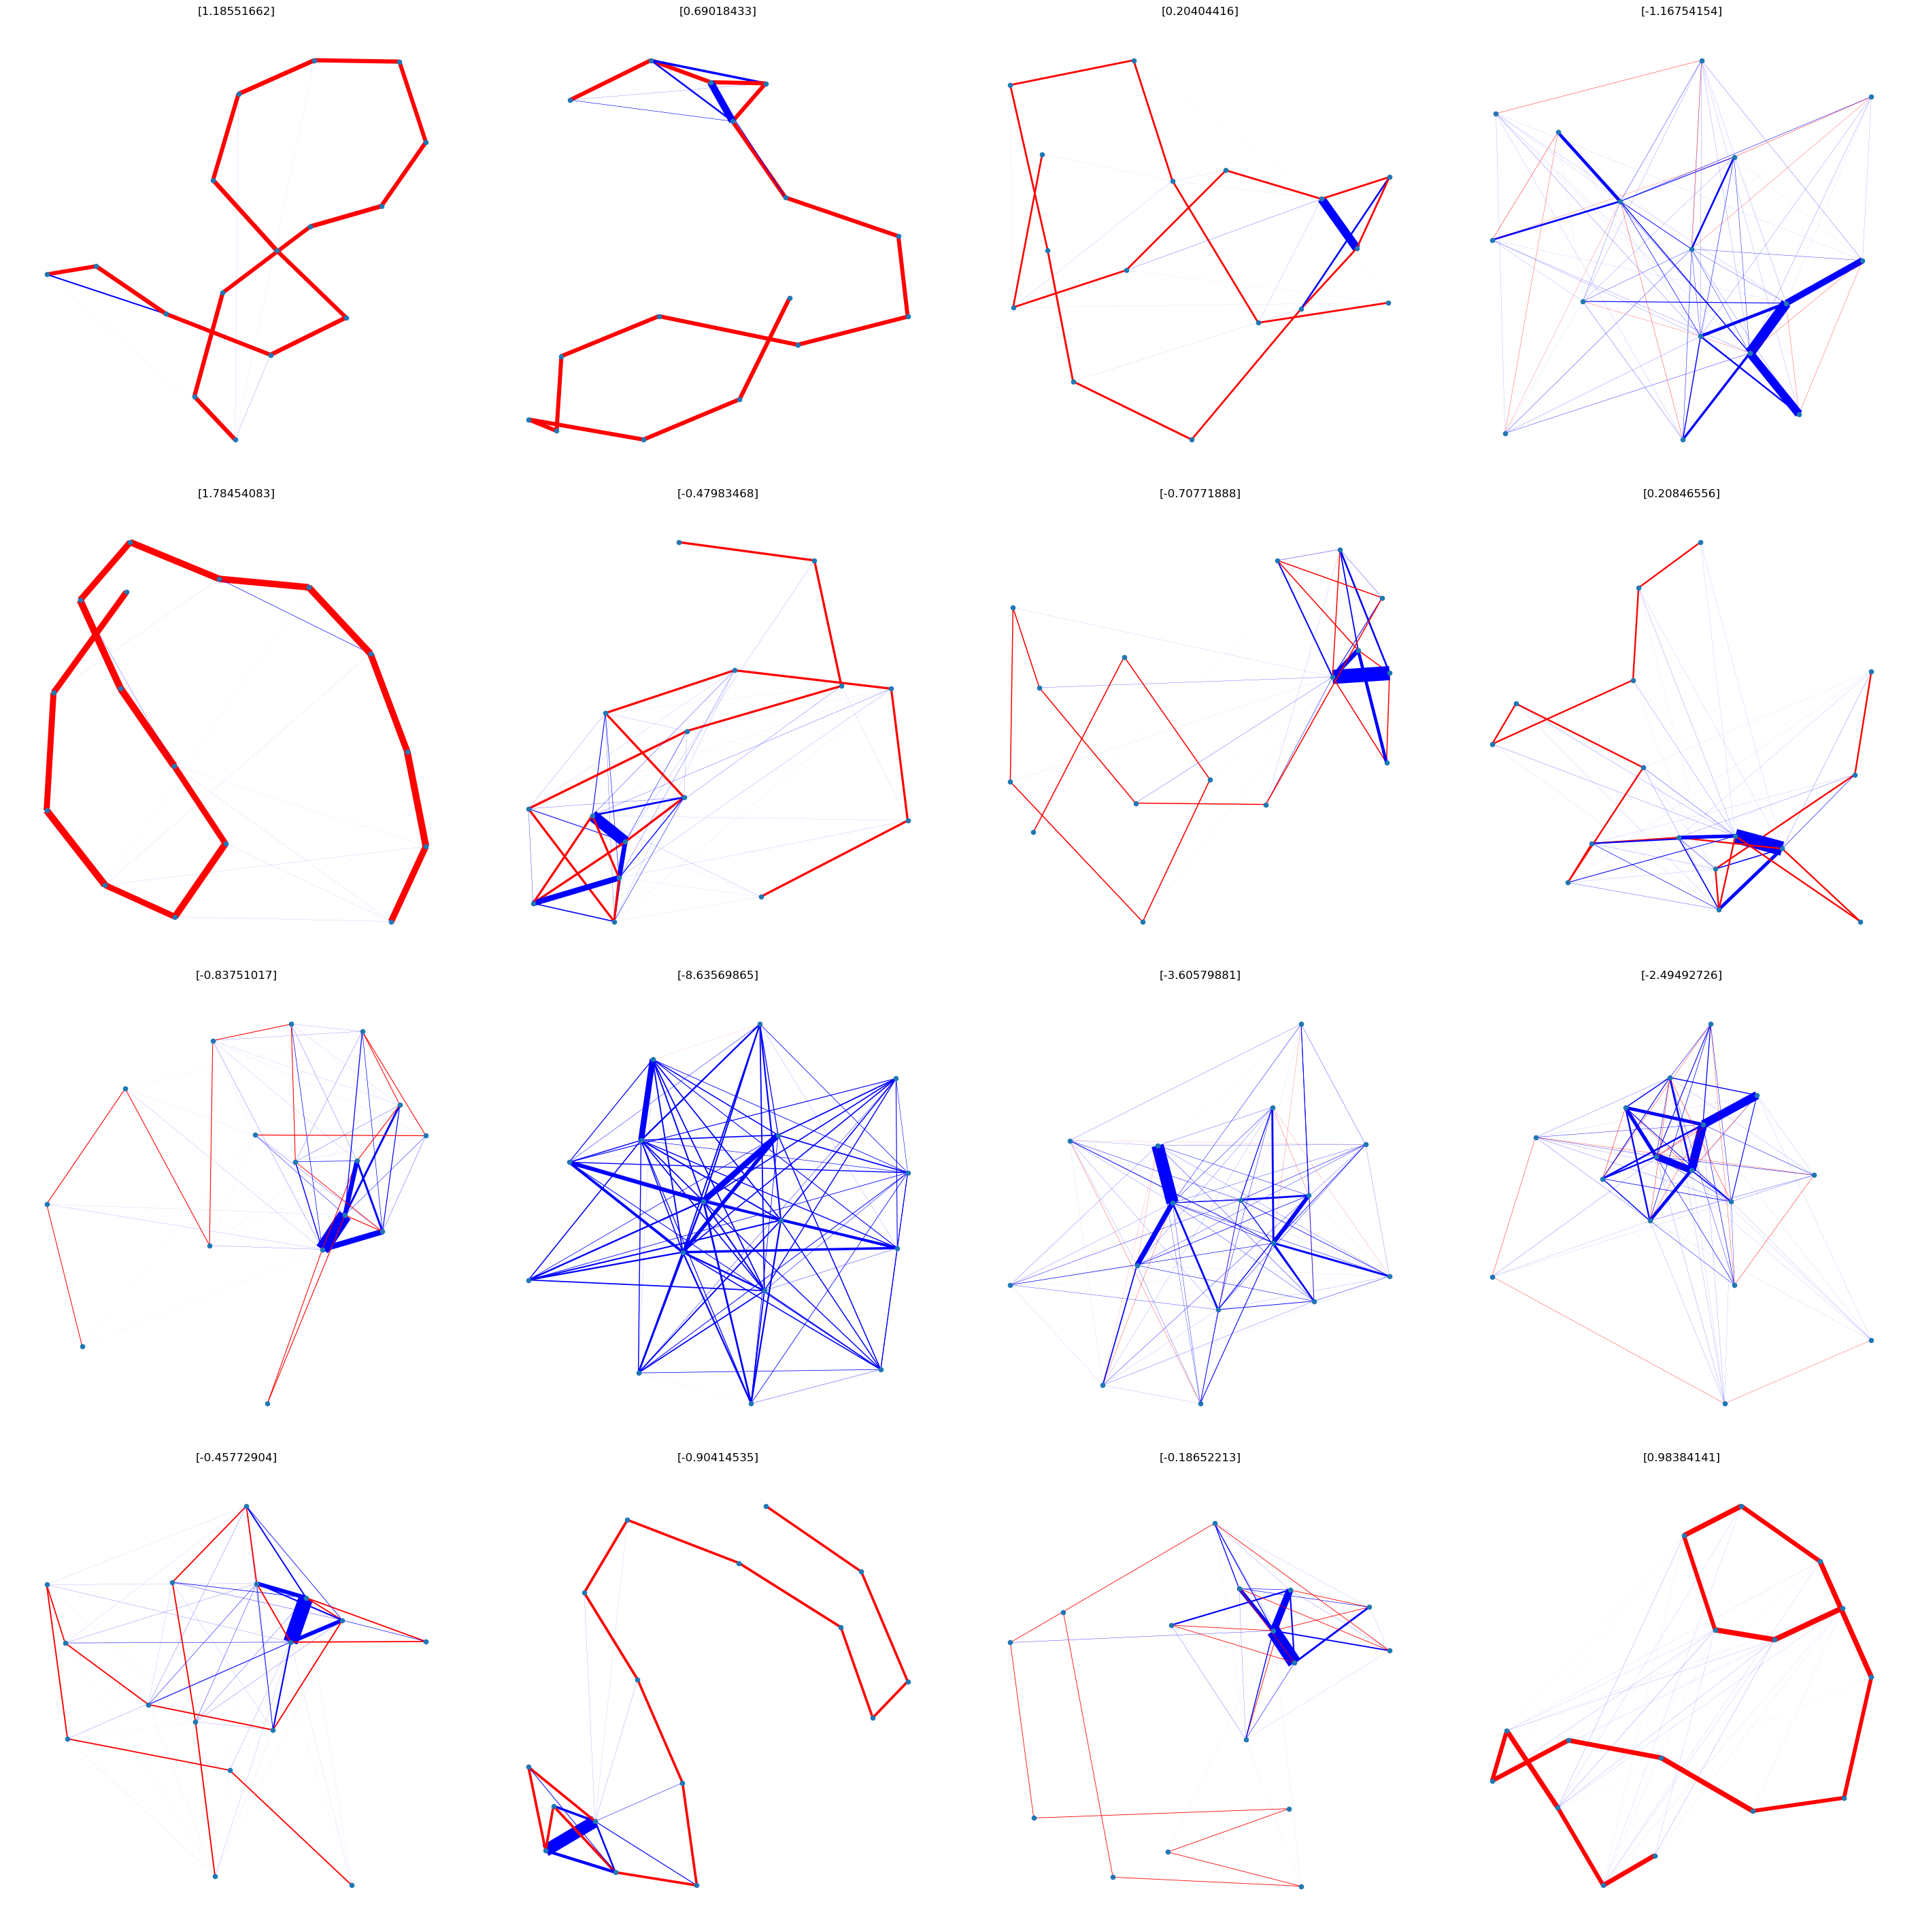

In [13]:
## Visualize dictionaries
display_dict_and_graph(save_path='output/figure/Cal_UCLA_1000_44884', W=W, regression_coeff=beta.T, fig_size=[35,35], plot_graph_only=True)

In [14]:
beta

array([[ 1.11304599,  1.18551662,  0.69018433,  0.20404416, -1.16754154,
         1.78454083, -0.47983468, -0.70771888,  0.20846556, -0.83751017,
        -8.63569865, -3.60579881, -2.49492726, -0.45772904, -0.90414535,
        -0.18652213,  0.98384141]])

In [11]:
### Harvard1, MIT8, Caltech36, UCLA26
path = "data/" + "MIT8" + '.txt'
G3 = nn.NNetwork()
G3.load_add_edges(path, increment_weights=False, use_genfromtxt=True)

prob = sndl_reg(G3, W, beta, 1000)

print(prob)

[0.9359635]
